In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulate
import util.phantom as phantom
from util.grappa import *

In [2]:
def gaussian_noise(shape, mu = 0, sigma = 1,  L = None):
    [ny, nx, nc] = shape
    n = np.zeros([ny * nx, nc], dtype = complex)
    n.real = np.random.normal(mu, sigma, ny*nx*nc).reshape(ny * nx, nc)
    n.imag = np.random.normal(mu, sigma, ny*nx*nc).reshape(ny * nx, nc)
    if L is None:
        return n.reshape(ny, nx, nc)
    n = n@L.T
    return n.reshape(ny, nx, nc)

In [12]:
R = 2
truth = phantom.brain(256, 8)
ny , nx, nc = truth.shape
n = gaussian_noise(truth.shape, sigma = 0.1)
data = truth + n 
acs = simulate.acs(data, (32,32))
dataR = data[::R]

In [ ]:
np.concatenate((rsos(ifft2c((truth)))[...,None], rsos(ifft2c((data)))[...,None]), -1).shape

(256, 256, 2)

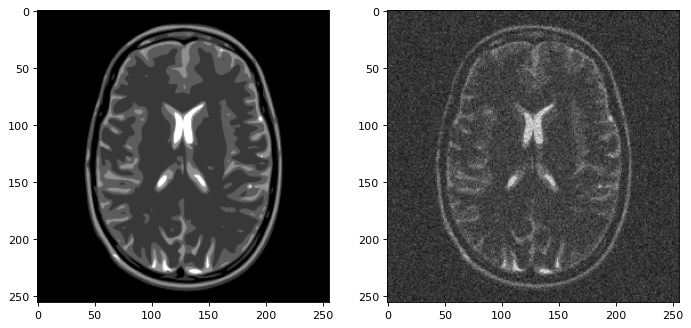

In [18]:
show(np.concatenate((rsos(ifft2c((truth)))[...,None], rsos(ifft2c((data)))[...,None]), -1))

In [14]:
ns = 10
recon = np.zeros([ny, nx, ns], dtype = complex)
lamdas = [0, 1E-1, 1E-2,1E-3, 1E-4,1E-5, 1E-6, 1E-7, 1E-8, 1E-9]
recon = np.zeros([ny, nx, ns], dtype = complex)
dif = []
for idx, lamda in enumerate(lamdas):
    recon[...,idx] = grappa(dataR, acs, R, lamda = lamda)
    dif.append(np.sum(np.abs((np.abs((recon[...,idx]))-np.abs(phantom.shepp_logan(256))))**2))

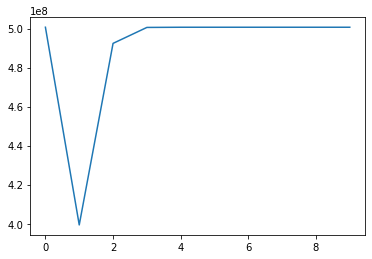

In [15]:
plt.plot(dif)

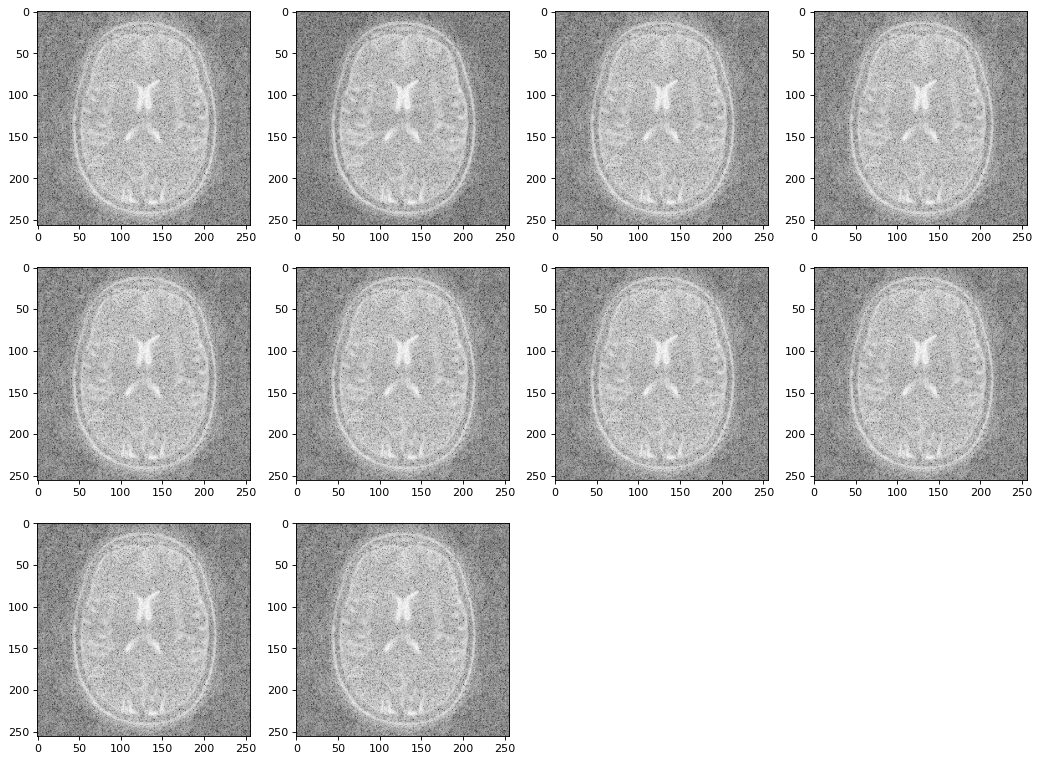

In [21]:
show(np.log(np.abs(recon)))